In [ ]:
# Import các thư viện và hàm cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,  KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# **1. TỔNG QUAN**

In [ ]:
# Đoc file dữ liệu từ drive
data = pd.read_csv('/content/drive/My Drive/P28/Sample code/Datasample.csv')
# Tạo 1 bản copy
df = data.copy()

NameError: ignored

In [ ]:
# Hiển thị 5 dòng đầu tiên
df.head(5)

,f1,f2,f3,f4,f5,f6,f7,f7.1,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,Customer_ID,y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,361.0,1000001,Y
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,240.0,1000002,Y
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,1504.0,1000003,Y
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,1812.0,1000004,Y
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,434.0,1000005,Y


In [ ]:
# Hiển thị thông tin chung (tên cột, non-null count, dtype: định dạng dữ liệu)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   f1           99643 non-null   float64
 1   f2           99643 non-null   float64
 2   f3           99643 non-null   float64
 3   f4           99643 non-null   float64
 4   f5           99643 non-null   float64
 5   f6           99643 non-null   float64
 6   f7           99643 non-null   float64
 7   f7.1         99643 non-null   float64
 8   f8           99643 non-null   float64
 9   f9           99109 non-null   float64
 10  f10          99109 non-null   float64
 11  f11          100000 non-null  float64
 12  f12          100000 non-null  float64
 13  f13          100000 non-null  float64
 14  f14          100000 non-null  float64
 15  f15          100000 non-null  float64
 16  f16          100000 non-null  float64
 17  f17          100000 non-null  float64
 18  f18          100000 non-

> # *1.1. Phân tích và xử lí sơ bộ biến mục tiêu*

In [ ]:
# @title 1.1.1. Kiểm tra unique value
unique_values_tar = df['y'].unique()
print(f"Các giá trị duy nhất trong cột tar_column:\n{unique_values_tar}")

Các giá trị duy nhất trong cột tar_column:
['Y' 'N' nan]


In [ ]:
# @title 1.1.2. Biến đổi biến mục tiêu
# Chuyển đổi các giá trị của biến y thành 1 và 0
df['y'] = df['y'].replace({'Y': 1, 'N': 0})
# Đếm số lượng giá trị của cột mục tiêu sau biến đổi
count_values_after_transformation = df['y'].value_counts()
# Đếm tỷ lệ phần trăm của giá trị 1 và 0 trong cột 'Y' sau biến đổi
percentage_values_after_transformation = df['y'].value_counts(normalize=True) * 100

print(f"Số lượng giá trị của cột tar_column sau biến đổi:\n",count_values_after_transformation)
print(f"\nTỷ lệ phần trăm giá trị của cột tar_column sau biến đổi:\n",percentage_values_after_transformation)

Số lượng giá trị của cột tar_column sau biến đổi:
 1.0    67234
0.0    31034
Name: y, dtype: int64

Tỷ lệ phần trăm giá trị của cột tar_column sau biến đổi:
 1.0    68.419017
0.0    31.580983
Name: y, dtype: float64


In [ ]:
# @title 1.1.3. Xóa missing value
# In ra số lượng giá trị thiếu trong biến y
missing_values_y = df['y'].isnull().sum()
# Xóa các dòng có giá trị thiếu trong biến y
y_del_df = df.dropna(subset=["y"])

In [ ]:
# @title 1.1.4. Kết quả sau xử lí
# In ra số dòng của cột y
print(f"Số dòng của cột target column: {len(y_del_df['y'])}")

# In ra kiểu dữ liệu của cột y
print(f"Kiểu dữ liệu của cột target column: {y_del_df['y'].dtype}")

# In ra số lượng giá trị thiếu của cột y
missing_values_y = y_del_df['y'].isnull().sum()
print(f"Số lượng giá trị thiếu trong target column: {missing_values_y}")



Số dòng của cột target column: 98268
Kiểu dữ liệu của cột target column: float64
Số lượng giá trị thiếu trong target column: 0


 > # *1.2. Phân tích và xử lí sơ bộ biến đặc trưng*

In [ ]:
# Tính số lượng giá trị thiếu và giá trị duy nhất cho mỗi cột
missing_values = y_del_df.isnull().sum()
unique_values = y_del_df.nunique()

# Tính tỷ lệ giá trị thiếu và giá trị duy nhất
missing_percentage = (missing_values / y_del_df.shape[0] * 100).values
unique_percentage =  (unique_values / y_del_df.count() * 100).values

# Tạo DataFrame
uniq_miss_result_df = pd.DataFrame({'Cột': missing_values.index,
                          'Thiếu': missing_values.values,
                          '% Thiếu': missing_percentage,
                          'Số Unique': unique_values.values,
                          '% Unique': unique_percentage})

# Tính tỷ lệ phần trăm của giá trị duy nhất xuất hiện nhiều nhất trong mỗi cột
uniq_miss_result_df['% Unique Value Nhiều Nhất'] = [
    (y_del_df[col].value_counts().max() / y_del_df[col].count()) * 100 if not y_del_df[col].value_counts().empty else 0 for col in missing_values.index]

# Sắp xếp theo tỷ lệ giảm dần
uniq_miss_result_df = uniq_miss_result_df.sort_values(by='% Unique Value Nhiều Nhất', ascending=False)

# In ra DataFrame
print(uniq_miss_result_df.to_string(index=False))

        Cột  Thiếu   % Thiếu  Số Unique   % Unique  % Unique Value Nhiều Nhất
        f85  20347 20.705621          2   0.002567                  99.712529
        f46      0  0.000000         43   0.043758                  99.571580
        f20      0  0.000000         93   0.094639                  99.131966
        f14      0  0.000000         53   0.053934                  98.778850
        f12      0  0.000000         60   0.061058                  97.414214
        f80  31974 32.537550          2   0.003017                  96.968051
        f16      0  0.000000         50   0.050881                  96.889120
        f92      0  0.000000          2   0.002035                  95.917287
        f93      0  0.000000          2   0.002035                  95.221232
        f90      0  0.000000          2   0.002035                  94.202589
        f94      0  0.000000          2   0.002035                  91.784711
        f79      0  0.000000          2   0.002035              

In [ ]:
# @title 1.2.1. Kiểm tra duplicated column và row

# Kiểm tra sự giống nhau giữa các cặp cột
for i in range(y_del_df.shape[1]):
    for j in range(i+1, y_del_df.shape[1]):
        if df.iloc[:, i].equals(y_del_df.iloc[:, j]):
            print(f"Cột {y_del_df.columns[i]} giống hệt với cột {y_del_df.columns[j]}")
            break
else:
  print('Không có cột nào bị trùng lặp')

# Kiểm tra và so sánh các dòng trùng lặp
duplicated_rows = y_del_df[y_del_df.duplicated()]
if not duplicated_rows.empty:
    # Print the duplicated rows
    print("Các dòng bị trùng lặp:")
    print(duplicated_rows)
else:
    print("Không có dòng bị trùng lặp")

Không có cột nào bị trùng lặp
Không có dòng bị trùng lặp


In [ ]:
# @title 1.2.2. Hiển thị giá trị của cột kiểu object

# Lọc các cột có kiểu dữ liệu là object
object_columns = y_del_df.select_dtypes(include=['object']).columns

# In ra unique values trong các cột có kiểu dữ liệu là object
for column in object_columns:
    unique_values = y_del_df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")

Unique values in f52 column: ['U' 'N' 'Y']
Unique values in f53 column: ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'U' 'Z' 'E' 'J' 'E4' 'W' 'DA' 'Y'
 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'ZY' 'E2' 'A3' 'V1' 'EF' 'Z2'
 'CY' 'EC' 'P1' 'IF' 'ZF' 'L']
Unique values in f54 column: ['N' 'Y']
Unique values in f70 column: ['S' 'U' 'T' 'C' nan 'R']
Unique values in f71 column: ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' nan 'LOS ANGELES AREA']
Unique values in f72 column: ['Y' 'N' 'T' 'U' nan]
Unique values in f73 column: ['N' 'R' nan]
Unique values in f77 column: ['WCMB' 'WC' nan 'UNKW']
Unique values in

In [ ]:
# Lưu số dòng trước khi xóa
rows_before = y_del_df.shape[0]
# Tạo một DataFrame để lưu thông tin về số dòng bị xóa cho từng cột
deleted_rows_info = pd.DataFrame(columns=['Cột', 'Số dòng bị xóa'])
# Chọn các cột có tỷ lệ giá trị thiếu dưới 1% hoặc trên 90%
selected_columns = y_del_df.columns[(missing_percentage < 1) | (missing_percentage > 90)]

# Tạo bản sao của DataFrame để tránh cảnh báo SettingWithCopyWarning
y_del_df_copy = y_del_df.copy()

# Xóa các dòng có giá trị thiếu trong các cột được chọn và lưu thông tin
for col in selected_columns:
    rows_deleted = y_del_df_copy[col].isnull().sum()
    deleted_rows_info = deleted_rows_info.append({'Cột': col, 'Số dòng bị xóa': rows_deleted}, ignore_index=True)

# Xóa các dòng có giá trị thiếu trong các cột được chọn trên bản sao của DataFrame
y_del_df_copy.dropna(subset=selected_columns, inplace=True)

# Lưu số dòng sau khi xóa
rows_after = y_del_df_copy.shape[0]

# Hiển thị thông tin về số dòng bị xóa cho từng cột
print("Thông tin về số dòng bị xóa cho từng cột:")
print(deleted_rows_info)

# Hiển thị tổng số dòng bị xóa
rows_deleted_total = rows_before - rows_after
print(f"\nTổng số dòng bị xóa: {rows_deleted_total}")


<ipython-input-176-861f4dd53c0f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_rows_info = deleted_rows_info.append({'Cột': col, 'Số dòng bị xóa': rows_deleted}, ignore_index=True)
<ipython-input-176-861f4dd53c0f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_rows_info = deleted_rows_info.append({'Cột': col, 'Số dòng bị xóa': rows_deleted}, ignore_index=True)
<ipython-input-176-861f4dd53c0f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_rows_info = deleted_rows_info.append({'Cột': col, 'Số dòng bị xóa': rows_deleted}, ignore_index=True)
<ipython-input-176-861f4dd53c0f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

Thông tin về số dòng bị xóa cho từng cột:
            Cột Số dòng bị xóa
0            f1            348
1            f2            348
2            f3            348
3            f4            348
4            f5            348
..          ...            ...
81          f95              0
82          f96              0
83          f97              1
84  Customer_ID              0
85            y              0

[86 rows x 2 columns]

Tổng số dòng bị xóa: 1734


In [ ]:
# @title 1.2.4. Loại bỏ sơ bộ unique value
# Loại bỏ các cột có rất ít unique value và có unique value chiếm nhiều nhất từ 90% trở lên
# Lọc các cột theo điều kiện
filtered_columns = uniq_miss_result_df[(uniq_miss_result_df['% Unique Value Nhiều Nhất'] > 90)
                          & (uniq_miss_result_df['% Unique'] <= 1.0) & (uniq_miss_result_df['% Thiếu'] <= 1.0) ]
# In ra DataFrame sau khi lọc
print("Các cột cần loại bỏ:")
print(filtered_columns.to_string(index=False))
# Loại bỏ các cột
columns_to_remove = filtered_columns['Cột'].tolist()
uniq_del_df = y_del_df.drop(columns=columns_to_remove, axis=1)

Các cột cần loại bỏ:
Cột  Thiếu  % Thiếu  Số Unique  % Unique  % Unique Value Nhiều Nhất
f46      0      0.0         43  0.043758                  99.571580
f20      0      0.0         93  0.094639                  99.131966
f14      0      0.0         53  0.053934                  98.778850
f12      0      0.0         60  0.061058                  97.414214
f16      0      0.0         50  0.050881                  96.889120
f92      0      0.0          2  0.002035                  95.917287
f93      0      0.0          2  0.002035                  95.221232
f90      0      0.0          2  0.002035                  94.202589
f94      0      0.0          2  0.002035                  91.784711
f79      0      0.0          2  0.002035                  91.741971
f36      0      0.0        233  0.237107                  91.061180
f95      0      0.0          2  0.002035                  91.030651
f40      0      0.0        253  0.257459                  90.432287


> # *1.3. Output sau khi clean*

In [ ]:
# Tính số lượng giá trị thiếu và giá trị duy nhất cho mỗi cột
missing_values = uniq_del_df.isnull().sum()
unique_values = uniq_del_df.nunique()

# Tính tỷ lệ giá trị thiếu và giá trị duy nhất
missing_percentage = (missing_values / uniq_del_df.count() * 100).values
unique_percentage =  (unique_values / uniq_del_df.count() * 100).values

# Tạo DataFrame
uniq_miss_result_2_df = pd.DataFrame({'Cột': missing_values.index,
                          'Thiếu': missing_values.values,
                          '% Thiếu': missing_percentage,
                          'Số Unique': unique_values.values,
                          '% Unique': unique_percentage})

# Tính tỷ lệ phần trăm của giá trị duy nhất xuất hiện nhiều nhất trong mỗi cột
uniq_miss_result_2_df['% Unique Value Nhiều Nhất'] = [
    (uniq_del_df[col].value_counts().max() / uniq_del_df[col].count()) * 100 if not uniq_del_df[col].value_counts().empty else 0 for col in missing_values.index]

# Sắp xếp theo tỷ lệ giảm dần
uniq_miss_result_2_df = uniq_miss_result_2_df.sort_values(by='% Unique Value Nhiều Nhất', ascending=False)

# In ra DataFrame
print(uniq_miss_result_2_df.to_string(index=False))

        Cột  Thiếu   % Thiếu  Số Unique   % Unique  % Unique Value Nhiều Nhất
        f85  20347 26.112345          2   0.002567                  99.712529
        f80  31974 48.230609          2   0.003017                  96.968051
        f38      0  0.000000       3125   3.180079                  91.063215
        f42      0  0.000000       3493   3.554565                  90.420076
        f96      0  0.000000          2   0.002035                  89.860382
        f29      0  0.000000       4357   4.433793                  86.634510
        f22      0  0.000000        361   0.367363                  86.634510
       f7.1    348  0.355392        769   0.785335                  86.295956
        f54      0  0.000000          2   0.002035                  86.257988
        f73      1  0.001018          2   0.002035                  85.570944
        f18      0  0.000000        381   0.387715                  85.052102
        f77  10053 11.396021          3   0.003401              

In [ ]:
# In ra kết quả sau bước data cleaning
uniq_del_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98268 entries, 0 to 99999
Data columns (total 87 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   f1           97920 non-null  float64
 1   f2           97920 non-null  float64
 2   f3           97920 non-null  float64
 3   f4           97920 non-null  float64
 4   f5           97920 non-null  float64
 5   f6           97920 non-null  float64
 6   f7           97920 non-null  float64
 7   f7.1         97920 non-null  float64
 8   f8           97920 non-null  float64
 9   f9           97392 non-null  float64
 10  f10          97392 non-null  float64
 11  f11          98268 non-null  float64
 12  f13          98268 non-null  float64
 13  f15          98268 non-null  float64
 14  f17          98268 non-null  float64
 15  f18          98268 non-null  float64
 16  f19          98268 non-null  float64
 17  f21          98268 non-null  float64
 18  f22          98268 non-null  float64
 19  f23 

Số cột còn lại: 87 cột (71 cột số, 16 cột object

Số dòng còn lại: 98,268

# **2. DATA PREPROCESSING VÀ EDA**

In [ ]:
# Sao chép DataFrame đã clean ở phần 1
cleaned_df = uniq_del_df.copy()

> # *2.1. Tách thành feature và label df*

In [ ]:
# Tách cột y và features (X) sang hai df khác nhau
df_features = cleaned_df.drop(columns=['y'])  # DataFrame chứa các feature
df_labels = cleaned_df['y']  # DataFrame chứa label
# In ra một số dòng đầu của df_features và df_labels
print("DataFrame chứa các tính năng:")
print(df_features.head(5))
print("\nDataFrame chứa nhãn:")
print(df_labels.head(5))

DataFrame chứa các tính năng:
        f1      f2      f3      f4     f5   f6   f7  f7.1   f8      f9  ...  \
0  23.9975  219.25  22.500  0.2475   0.00  0.0  0.0   0.0  0.0 -157.25  ...   
1  57.4925  482.75  37.425  0.2475  22.75  9.1  9.1   0.0  0.0  532.25  ...   
2  16.9900   10.25  16.990  0.0000   0.00  0.0  0.0   0.0  0.0   -4.25  ...   
3  38.0000    7.50  38.000  0.0000   0.00  0.0  0.0   0.0  0.0   -1.50  ...   
4  55.2300  570.50  71.980  0.0000   0.00  0.0  0.0   0.0  0.0   38.50  ...   

   f84  f85  f86  f87  f88  f89  f91  f96     f97  Customer_ID  
0  1.0    M  4.0  3.0    C    A    N    U   361.0      1000001  
1  1.0    M  5.0  1.0    C    A    Z    U   240.0      1000002  
2  2.0    M  5.0  2.0    C    A    N    U  1504.0      1000003  
3  4.0    M  6.0  1.0    C    D    U    U  1812.0      1000004  
4  1.0    M  6.0  1.0    C    O    I    U   434.0      1000005  

[5 rows x 86 columns]

DataFrame chứa nhãn:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y, dtype:

> # *2.3. Chia dữ liệu*

In [ ]:
# @title 2.3.1. Tách thành tập train, test

X = df_features
y = df_labels
# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# In ra số lượng giá trị mỗi tập
print(f"Số lượng mẫu trong tập huấn luyện:\n {len(X_train)}")
print(f"Số lượng mẫu trong tập kiểm tra:\n {len(X_test)}")
# In ra số lượng giá trị trong từng tập
print("y_train:\n",y_train.value_counts())
print("y_test:\n",y_test.value_counts())


Số lượng mẫu trong tập huấn luyện:
 78614
Số lượng mẫu trong tập kiểm tra:
 19654
y_train:
 1.0    53783
0.0    24831
Name: y, dtype: int64
y_test:
 1.0    13451
0.0     6203
Name: y, dtype: int64


In [ ]:
# @title 2.3.2. Thống kê cơ bản
X_train.describe()

,f1,f2,f3,f4,f5,f6,f7,f7.1,f8,f9,...,f74,f75,f76,f78,f81,f84,f86,f87,f97,Customer_ID
count,78330.000000,78330.000000,78330.000000,78330.000000,78330.000000,78330.000000,78330.000000,78330.000000,78330.000000,77907.000000,...,77940.000000,78613.000000,78613.000000,78614.000000,55868.000000,61618.000000,59653.000000,40574.000000,78613.000000,7.861400e+04
mean,58.539584,511.735357,46.087787,0.888335,40.796637,13.486311,13.226426,0.257200,1.286528,-14.102272,...,101.579547,1.788190,1.546475,0.189114,6.185509,2.534454,5.783313,1.566545,392.942732,1.049859e+06
std,46.901116,525.722948,23.625412,2.205616,97.894565,30.647405,30.222290,2.804803,16.161887,279.860099,...,60.941535,1.323429,0.901890,0.391602,4.738455,1.454055,2.176309,0.625572,256.785525,2.883659e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,9.989998,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-5.000000,1.000001e+06
25%,33.240000,149.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.250000,...,29.989990,1.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,212.000000,1.024927e+06
50%,48.002500,354.500000,44.990000,0.247500,2.750000,1.000000,0.675000,0.000000,0.000000,-6.250000,...,99.989990,1.000000,1.000000,0.000000,5.000000,2.000000,6.000000,1.000000,342.000000,1.049784e+06
75%,70.460000,699.000000,59.990000,0.742500,41.750000,14.316250,13.912500,0.000000,0.235000,62.250000,...,149.989990,2.000000,2.000000,0.000000,9.000000,3.000000,7.000000,2.000000,532.000000,1.074778e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,890.762500,294.800000,3685.200000,31219.250000,...,499.989990,28.000000,16.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1813.000000,1.099999e+06


> # *2.4. Xử lí missing data*

In [ ]:
def handle_missing_values(df: pd.DataFrame, num_strat: str, cat_strat: str):
    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(exclude=['number']).columns

    # Define a dictionary mapping strategy names to imputation methods or functions
    num_imputation_strategies = {
        "mean": SimpleImputer(strategy="mean"),
        "median": SimpleImputer(strategy="median"),
        "knn": KNNImputer(n_neighbors=5), # Use KNN imputer with 5 neighbors
        "regression": LinearRegression(), # Use Linear Regression for numerical data
    }

    cat_imputation_strategies = {
        "mode": SimpleImputer(strategy="most_frequent"),
        "random": None, # Implement your random sampling imputation method here
        "knn": KNNImputer(n_neighbors=5), # Use KNN imputer with 5 neighbors for categorical data
        "regression": None, # Implement regression-based imputation for categorical data
    }

    # Impute numerical missing values
    num_imputer = num_imputation_strategies.get(num_strat)
    if num_cols.any() and num_imputer:
        df[num_cols] = num_imputer.fit_transform(df[num_cols])

    # Impute categorical missing values
    cat_imputer = cat_imputation_strategies.get(cat_strat)
    if cat_cols.any() and cat_imputer:
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

    return df

# Gọi hàm xử lí missing value chỉ cho tập X_train
X_train_missing_handled = handle_missing_values(X_train, num_strat='mean', cat_strat='mode')

# Kiểm tra lại số lượng missing value sau khi xử lý
missing_values_count_train = X_train_missing_handled.isnull().sum()
# Hiển thị số lượng missing value sau khi xử lý
print("Missing Values Count After Processing - Training Set:")
print(missing_values_count_train)
# In ra số lượng giá trị trong tập X_train
print("X_train:", X_train_missing_handled.value_counts())

# Áp dụng cùng hàm xử lý missing value cho X_test
X_test_missing_handled = handle_missing_values(X_test, num_strat='mean', cat_strat='mode')

# Kiểm tra lại số lượng missing value sau khi xử lý trên X_test
missing_values_count_test = X_test_missing_handled.isnull().sum()
# Hiển thị số lượng missing value sau khi xử lý trên X_test
print("Missing Values Count After Processing - Test Set:")
print(missing_values_count_test)
# In ra số lượng giá trị trong tập X_test
print("X_test:", X_test_missing_handled.value_counts())

Missing Values Count After Processing - Training Set:
f1             0
f2             0
f3             0
f4             0
f5             0
              ..
f89            0
f91            0
f96            0
f97            0
Customer_ID    0
Length: 86, dtype: int64
X_train: f1          f2        f3        f4      f5     f6       f7       f7.1   f8       f9         f10         f11        f13        f15         f17         f18       f19        f21         f22       f23       f24       f25       f26        f27       f28         f29   f30         f31        f32        f33        f34        f35         f37         f38   f39         f41         f42  f43        f44         f45         f47       f48  f49   f50  f51  f52  f53  f54  f55     f56      f57      f58      f59      f60     f61     f62      f63     f64     f65    f66    f67          f68         f69         f70  f71                        f72  f73  f74         f75  f76  f77   f78  f80  f81       f82  f83  f84       f85  f86       f87   

> # *2.2. Encoding data*

In [ ]:
def encode_features(X_train, X_test, object_columns_train):
    # Mã hóa dữ liệu X
    preprocessor_X = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), X_train.columns.difference(object_columns_train)),
            ('cat', OneHotEncoder(handle_unknown='ignore'), object_columns_train)
        ],
        remainder='passthrough'
    )

    # Fit and transform the training data for X
    encoded_data_train_X = preprocessor_X.fit_transform(X_train)
    encoded_columns_X = preprocessor_X.get_feature_names_out(X_train.columns)

    # Transform the test data for X using the fitted transformer for X_train
    encoded_data_test_X = preprocessor_X.transform(X_test)
    encoded_columns_X_test = preprocessor_X.get_feature_names_out(X_test.columns)

    # Create DataFrames with the encoded columns for X
    X_train_encoded = pd.DataFrame(encoded_data_train_X, columns=encoded_columns_X)
    X_test_encoded = pd.DataFrame(encoded_data_test_X, columns=encoded_columns_X_test)

    return X_train_encoded, X_test_encoded

# Gọi hàm mã hóa dữ liệu cho training và test
object_columns_train_X = X_train.select_dtypes(include=['object']).columns
X_train_encoded, X_test_encoded = encode_features(X_train_missing_handled, X_test_missing_handled, object_columns_train_X)

# In ra thông tin của tập X_train sau khi mã hóa
print("\nDữ liệu sau khi mã hóa - X_train:")
print(X_train_encoded.head(5))

# In ra thông tin của tập X_test sau khi mã hóa
print("\nDữ liệu sau khi mã hóa - X_test:")
print(X_test_encoded.head(5))



Dữ liệu sau khi mã hóa - X_train:
   num__Customer_ID   num__f1  num__f10   num__f11  num__f13   num__f15  \
0         1016305.0   33.7575   -3.7675   1.333333  1.000000  10.000000   
1         1049405.0   96.3650    3.5950  22.333333  4.000000  75.000000   
2         1097456.0  102.2900   38.9000   0.666667  3.666667   9.333333   
3         1016712.0   80.3325  -29.3425   7.333333  0.000000  22.333333   
4         1071953.0   30.2600   -0.2700   0.000000  0.333333   4.333333   

     num__f17  num__f18    num__f19  num__f2  ...  cat__f91_N  cat__f91_O  \
0   45.666667  0.000000   14.333333   112.25  ...         1.0         0.0   
1  479.000000  0.000000  219.666667  1276.50  ...         0.0         0.0   
2   36.000000  0.333333    9.666667   780.25  ...         1.0         0.0   
3  139.666667  0.000000  140.666667   601.25  ...         0.0         0.0   
4   23.000000  0.000000    3.333333   291.50  ...         0.0         1.0   

   cat__f91_P  cat__f91_R  cat__f91_S  cat__f91_U  

In [ ]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78614 entries, 0 to 78613
Columns: 211 entries, num__Customer_ID to cat__f96_Y
dtypes: float64(211)
memory usage: 126.6 MB


In [ ]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19654 entries, 0 to 19653
Columns: 211 entries, num__Customer_ID to cat__f96_Y
dtypes: float64(211)
memory usage: 31.6 MB


In [ ]:
X_train_encoded.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [ ]:
train_df = pd.concat([X_train_encoded, y_train], axis=1)
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78614 entries, 0 to 78613
Columns: 212 entries, num__Customer_ID to y
dtypes: float64(212)
memory usage: 127.2 MB


,num__Customer_ID,num__f1,num__f10,num__f11,num__f13,num__f15,num__f17,num__f18,num__f19,num__f2,...,cat__f91_O,cat__f91_P,cat__f91_R,cat__f91_S,cat__f91_U,cat__f91_X,cat__f91_Z,cat__f96_U,cat__f96_Y,y
count,7.861400e+04,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,...,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.000000,78614.00000
mean,1.049859e+06,58.539584,-0.944726,5.950073,3.995828,27.679879,144.574011,0.867293,54.803233,511.735357,...,0.042333,0.005139,0.010520,0.129659,0.111240,0.000890,0.044712,0.898377,0.101623,0.68414
std,2.883659e+04,46.816321,53.033080,9.009435,10.487058,38.163863,158.572877,9.044734,86.832268,524.772467,...,0.201350,0.071503,0.102026,0.335930,0.314431,0.029827,0.206672,0.302154,0.302154,0.46486
min,1.000001e+06,-6.167500,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.024927e+06,33.250000,-7.112500,0.666667,0.000000,5.000000,38.000000,0.000000,5.333333,150.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,1.049784e+06,48.196250,-0.315000,3.000000,1.000000,15.666667,100.000000,0.000000,26.333333,356.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000
75%,1.074778e+06,70.290000,1.590000,7.666667,3.666667,35.666667,198.333333,0.000000,71.000000,697.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000
max,1.099999e+06,3843.262500,9963.657500,232.666667,385.333333,848.666667,2289.000000,733.666667,3369.333333,12206.750000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


> # *2.5. Ma trận tương quan và biểu đồ phân phối*

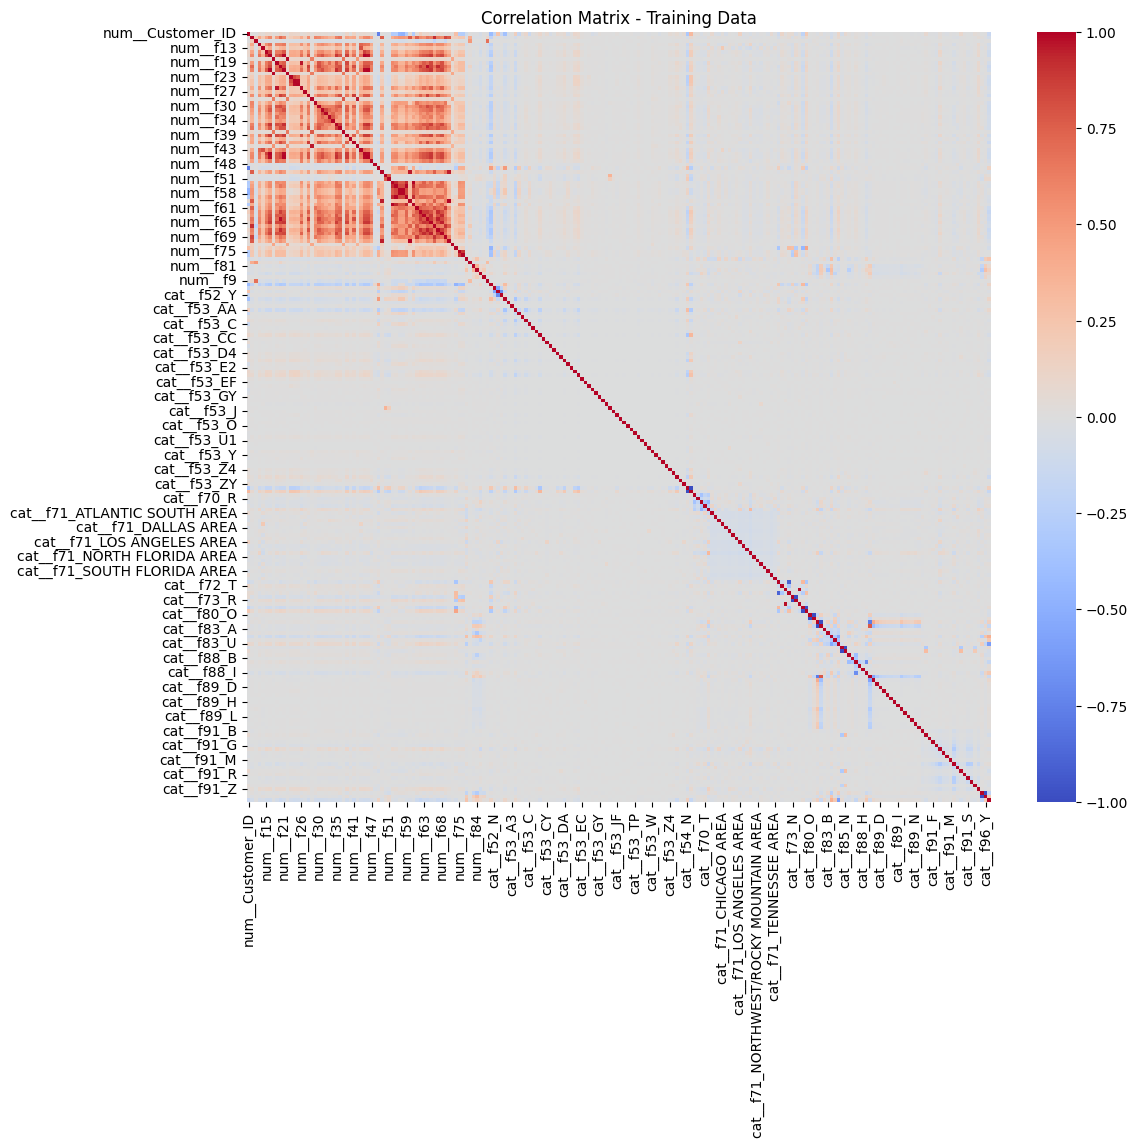

In [ ]:
# Tính toán correlation matrix
correlation_matrix = train_df.corr()

# Vẽ heatmap của correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Training Data")
plt.show()

ValueError: ignored

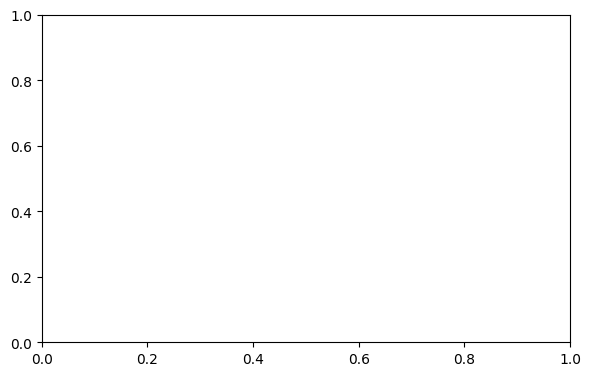

In [ ]:
# Get the list of object columns in train_df
object_columns = X_train_missing_handled.select_dtypes(include='object').columns

# Set the number of rows and columns in the subplot grid
num_rows = len(object_columns) // 2 + len(object_columns) % 2
num_cols = 2

# Set the size of the overall plot
plt.figure(figsize=(15, 5 * num_rows))

# Iterate through each object column and create subplots
for i, col in enumerate(object_columns, start=1):
    plt.subplot(num_rows, num_cols, i)

    # Create a count plot for the categorical column with hue=y
    sns.histplot(x=col, hue='y', data=train_df, multiple="layer", palette={0: 'blue', 1: 'orange'}, element="step", fill=True)

    # Set plot labels and title
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col} with respect to y')

# Adjust layout
plt.tight_layout()
plt.show()

> # *2.6*. *WoE*

In [ ]:
%pip install tabulate

Event là y=0

Non-event là y = 1

In [1]:
from tabulate import tabulate

def iv_woe_numeric_vars(data, target, iv_bins, iv_threshold, show_woe=True):
    iv_results = pd.DataFrame(columns=["Variable", "IV", "WOE"])
    numeric_vars = data.select_dtypes(include=[np.number]).columns

    for ivars in numeric_vars:
        # Bỏ qua cột được chỉ định
        if ivars == 'Customer_ID':
            continue

        d0 = data[[ivars, target]].copy()

        bins = pd.qcut(data[ivars], q=iv_bins, duplicates='drop')
        d0['bin'] = bins
        grouped = d0.groupby('bin', as_index=False)
        d = pd.DataFrame(grouped[target].agg(['count', 'sum', 'mean']))
        d.columns = ['Count', 'Non-Events', 'Non-Event Rate']
        d['Events'] = d['Count'] - d['Non-Events']
        d['Event Rate'] = d['Events'] / d['Events'].sum()
        d['Non-Event Rate'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WOE'] = np.log(d['Non-Event Rate'] / d['Event Rate'])
        d['IV'] = (d['Non-Event Rate'] - d['Event Rate']) * d['WOE']
        iv_value = d['IV'].sum()

        if show_woe:
            print("WOE and IV for", ivars)
            print(tabulate(d[['Count', 'Non-Events', 'Non-Event Rate', 'WOE', 'IV']], headers='keys', tablefmt='pretty'))

        iv_results = pd.concat([iv_results, pd.DataFrame({"Variable": [ivars], "IV": [iv_value], "WOE": [d['WOE'].iloc[0] if not d.empty else np.nan]})], ignore_index=True)

    iv_results = iv_results.sort_values(by='IV', ascending=False)
    selected_features = iv_results[iv_results['IV'] > iv_threshold]['Variable'].tolist()

    return iv_results, selected_features

# Áp dụng hàm iv_woe_numeric_vars cho tất cả các biến numeric trong tập train_df
iv_results_numeric, selected_features_numeric = iv_woe_numeric_vars(train_df, target='y', iv_bins=10, iv_threshold=0.02, show_woe=True)

# Hiển thị kết quả IV và danh sách các tính năng được chọn
print("Information Value Results (Numeric Variables Only):")
print(tabulate(iv_results_numeric, headers='keys', tablefmt='pretty'))  # Use tabulate for better formatting


NameError: ignored

In [ ]:
# Assume iv_results is the DataFrame containing IV results from iv_woe_all_vars
def _rank_IV(iv):
    if iv <= 0.02:
        return 'Useless'
    elif iv <= 0.1:
        return 'Weak'
    elif iv <= 0.3:
        return 'Medium'
    elif iv <= 0.5:
        return 'Strong'
    else:
        return 'Suspicious'

# Apply the _rank_IV function to the 'IV' column and create a new 'rank' column
iv_results['rank'] = iv_results['IV'].apply(_rank_IV)

# Sort the DataFrame by 'IV' column in descending order
iv_results = iv_results.sort_values('IV', ascending=False)

# Display the DataFrame with the new 'rank' column
print(iv_results.to_string())


In [ ]:
X_test_encoded.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test_full_df = pd.concat([X_test_encoded, y_test], axis=1)

X_train_encoded.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train_full_df = pd.concat([X_train_encoded, y_train], axis=1)

In [ ]:
X_train_by_woe = train_df[selected_features]
X_test_by_woe = X_test_encoded[X_train_by_woe.columns]

In [ ]:
from tabulate import tabulate

def iv_woe_all_vars(data, target, iv_bins, iv_threshold, show_woe=True):
    iv_results = pd.DataFrame(columns=["Variable", "IV", "WOE"])  # Include 'WOE' column
    independent_vars = data.columns.difference([target])

    for ivars in independent_vars:
        d0 = data[[ivars, target]].copy()

        # Handle NaN values by filling with a specific value or using another strategy
        d0[ivars].fillna(-9999, inplace=True)

        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(d0[ivars]):
            bins = pd.qcut(d0[ivars], q=iv_bins, duplicates='drop')
            d0['bin'] = bins
            grouped = d0.groupby('bin', as_index=False)
            d = pd.DataFrame(grouped[target].agg(['count', 'sum']))
            d.columns = ['Count', 'Non-Events']
            d['Events'] = d['Count'] - d['Non-Events']
            d['Event Rate'] = d['Events'] / d['Events'].sum()
            d['Non-Event Rate'] = d['Non-Events'] / d['Non-Events'].sum()
            d['WOE'] = np.log(d['Non-Event Rate'] / d['Event Rate'])
            d['IV'] = (d['Non-Event Rate'] - d['Event Rate']) * d['WOE']
        else:
            # Handle categorical variables
            d = pd.DataFrame(d0.groupby(ivars, as_index=False).agg({target: ['count', 'sum']}))
            d.columns = ['Variable', 'Count', 'Non-Events']
            d['Events'] = d['Count'] - d['Non-Events']
            d['Event Rate'] = d['Events'] / d['Events'].sum()
            d['Non-Event Rate'] = d['Non-Events'] / d['Non-Events'].sum()
            d['WOE'] = np.log(d['Non-Event Rate'] / d['Event Rate'])
            d['IV'] = (d['Non-Event Rate'] - d['Event Rate']) * d['WOE']

        iv_value = d['IV'].sum()

        if show_woe:
            print("WOE and IV for", ivars)
            print(tabulate(d, headers='keys', tablefmt='pretty'))

        iv_results = pd.concat([iv_results, pd.DataFrame({"Variable": [ivars], "IV": [iv_value], "WOE": [d['WOE'].iloc[0]]})], ignore_index=True)

    iv_results = iv_results.sort_values(by='IV', ascending=False)
    selected_features = iv_results[iv_results['IV'] > iv_threshold]['Variable'].tolist()

    return iv_results, selected_features

# Apply the WoE calculation function to the training data
iv_results, selected_features = iv_woe_all_vars(train_df, target='y', iv_bins=10, iv_threshold=0.02, show_woe=True)

# Display Information Value Results
print("Information Value Results:")
print(tabulate(iv_results, headers='keys', tablefmt='pretty'))

NameError: ignored

In [ ]:
# Assume woe_mapping is the dictionary containing WoE mappings from iv_results
# Replace this with the actual WoE mapping
woe_mapping = {}

# Create a new dataframe to store the WoE-transformed values for the training set
train_woe = train_df.copy()

# Loop through selected features and fill in WoE values in the training set
for ivars in selected_features:
    # Skip Customer ID column
    if ivars == 'num__Customer_ID':
        continue

    # Create bins for the current variable
    if pd.api.types.is_numeric_dtype(train_woe[ivars]):
        bins = pd.qcut(train_woe[ivars], q=10, duplicates='drop')
        bin_categories = bins.cat.categories.to_list()
    else:
        bins = train_woe[ivars].unique()
        bin_categories = bins.tolist()

    # Map WoE values to the bins and create a dictionary for mapping
    woe_mapping[ivars] = {bin_category: iv_results.set_index('Variable').loc[ivars, 'WOE'] for bin_category in bin_categories}

    # Apply WoE mapping to the current column, excluding 'Customer ID'
    if ivars != 'num__Customer_ID':
        train_woe[ivars] = train_woe[ivars].map(woe_mapping[ivars])

# Drop the 'bin' column if it exists
if 'bin' in train_woe.columns:
    train_woe.drop('bin', axis=1, inplace=True)

# Display the info() of the X_train_woe dataframe with WoE values
print("\nInfo for X_train_woe:")
print(train_woe.info())



Info for X_train_woe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78614 entries, 0 to 78613
Columns: 212 entries, num__Customer_ID to y
dtypes: float64(212)
memory usage: 127.2 MB
None


In [ ]:
train_woe.head()

,num__Customer_ID,num__f1,num__f10,num__f11,num__f13,num__f15,num__f17,num__f18,num__f19,num__f2,...,cat__f91_O,cat__f91_P,cat__f91_R,cat__f91_S,cat__f91_U,cat__f91_X,cat__f91_Z,cat__f96_U,cat__f96_Y,y
0,1016305.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.000000,0.289106,0.443263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1049405.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.000000,0.289106,0.443263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1097456.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.333333,0.289106,0.443263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1016712.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.000000,0.289106,0.443263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1071953.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.000000,0.289106,0.443263,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test_encoded.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test_df = pd.concat([X_test_encoded, y_test], axis=1)

In [ ]:
# Create a new dataframe to store the WoE-transformed values for the test set
test_woe = test_df.copy()

# Loop through selected features and fill in WoE values in the test set
for ivars in selected_features:
    # Skip Customer ID column
    if ivars == 'num__Customer_ID':
        continue

    # Create bins for the current variable using the same bins as in the training set
    if pd.api.types.is_numeric_dtype(test_woe[ivars]):
        bins = pd.qcut(test_woe[ivars], q=10, duplicates='drop', labels=False)
        bin_categories = pd.qcut(train_df[ivars], q=10, duplicates='drop').cat.categories.to_list()
    else:
        bins = pd.cut(test_woe[ivars], bins=pd.qcut(train_df[ivars], q=len(train_df[ivars].unique()), duplicates='drop').cat.categories, labels=False)
        bin_categories = train_df[ivars].unique()

    # Map WoE values to the bins using the WoE mapping obtained from the training set
    woe_mapping = {bin_category: iv_results.set_index('Variable').loc[ivars, 'WOE'] for bin_category in bin_categories}

    # Apply WoE mapping to the current column in the test set
    test_woe[ivars] = test_df[ivars].map(woe_mapping)

    # Drop the 'bin' column if it exists
    if 'bin' in test_woe.columns:
        test_woe.drop('bin', axis=1, inplace=True)

# Display the info() of the X_test_woe dataframe with WoE values
print("\nInfo for test_woe:")
print(test_woe.info())



Info for test_woe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19654 entries, 0 to 19653
Columns: 212 entries, num__Customer_ID to y
dtypes: float64(212)
memory usage: 31.8 MB
None


In [ ]:
test_woe.head()

,num__Customer_ID,num__f1,num__f10,num__f11,num__f13,num__f15,num__f17,num__f18,num__f19,num__f2,...,cat__f91_O,cat__f91_P,cat__f91_R,cat__f91_S,cat__f91_U,cat__f91_X,cat__f91_Z,cat__f96_U,cat__f96_Y,y
0,1085460.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.0,0.289106,0.443263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1032181.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.0,0.289106,0.443263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1098286.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.0,0.289106,0.443263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1001378.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.0,0.289106,0.443263,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1035967.0,0.34929,-0.338061,0.214219,0.113741,0.245884,0.074134,0.0,0.289106,0.443263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


> # *2.4. Xử lí outliers*

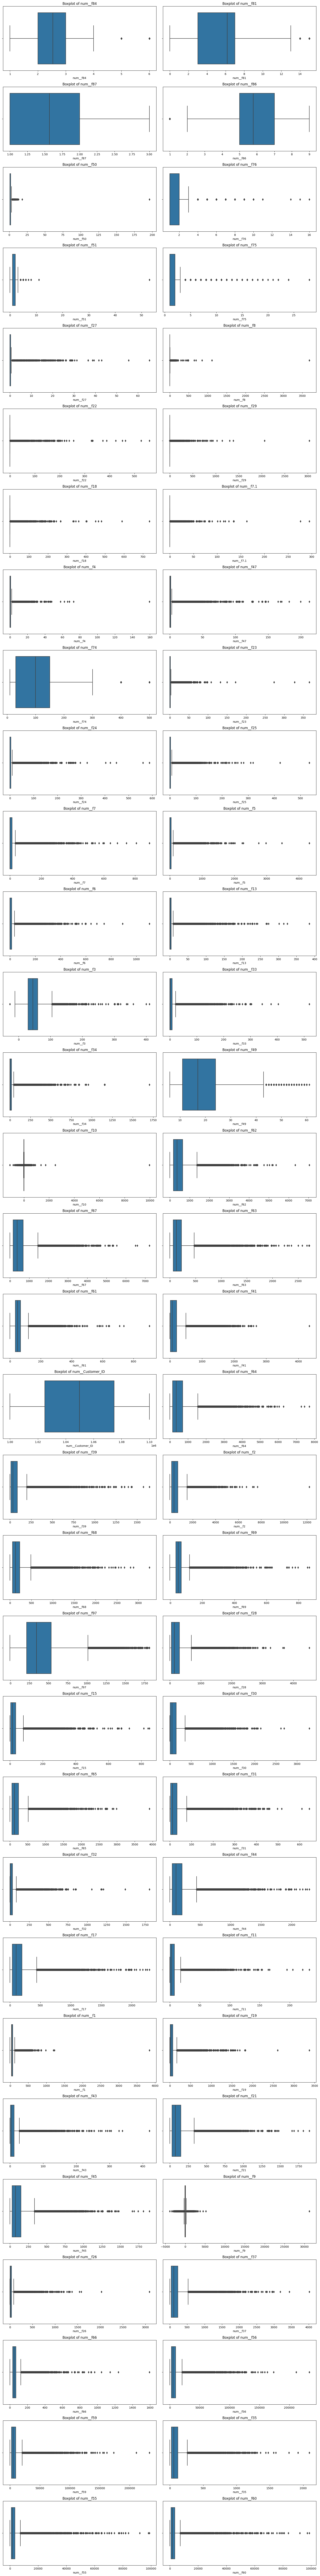

In [ ]:
# Calculate the number of rows and columns needed for subplots
n_columns = X_train_by_woe.shape[1]
n_rows = (n_columns // 2) + (n_columns % 2)

# Set the size of the plot
plt.figure(figsize=(16, 4 * n_rows))

# Iterate through each column in X_train_no_outliers
for i, column in enumerate(X_train_by_woe.columns):
    # Create a subplot for each column
    plt.subplot(n_rows, 2, i+1)

    # Plot boxplot for the current column
    sns.boxplot(x=X_train_by_woe[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the boxplots
plt.show()

In [ ]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

# 2. Define the find_boxplot_boundaries function
def find_boxplot_boundaries(col: pd.Series, whisker_coeff: float = 1.5) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

# 3. Define the BoxplotOutlierClipper transformer
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

# 4. Use the transformer to remove outliers for each column
outlier_clipper = BoxplotOutlierClipper(whisker_coeff=1.5)

X_train_no_outliers = pd.DataFrame()
outlier_clipper = BoxplotOutlierClipper(whisker_coeff=1.5)

for column in selected_features:  # Use the selected features list
    # Fit and transform each column separately
    column_no_outliers = outlier_clipper.fit_transform(X_train_by_woe[column])

    # Append the result to the new DataFrame
    X_train_no_outliers[column] = column_no_outliers

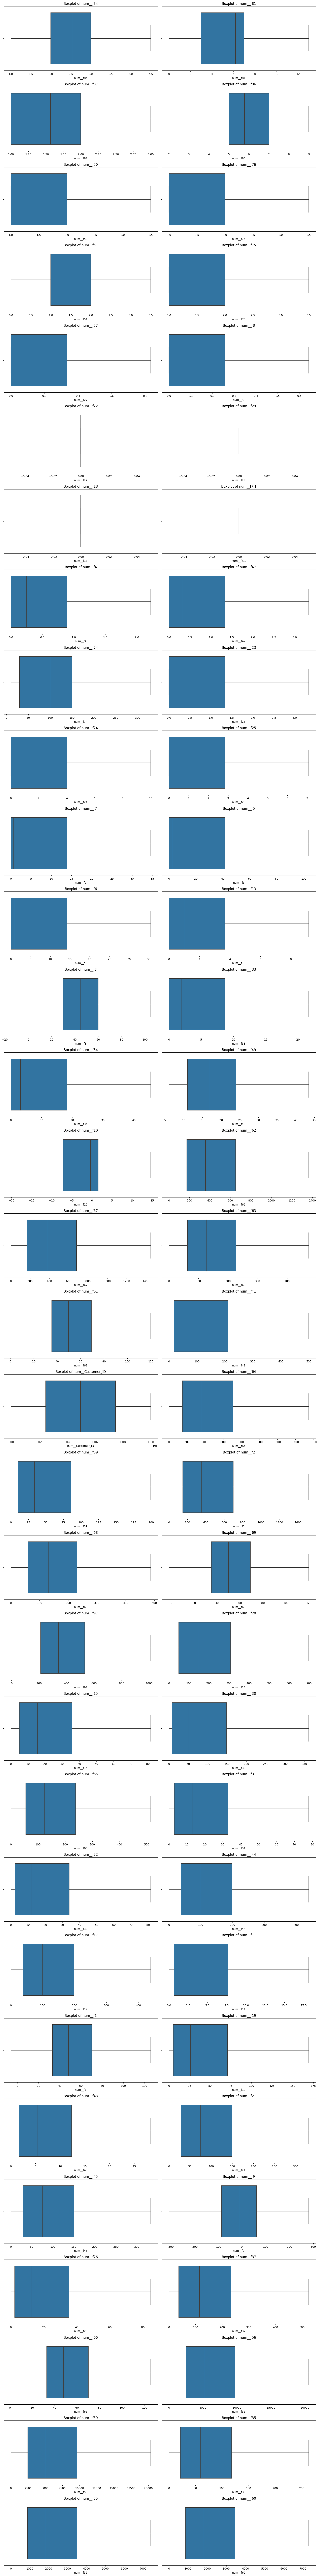

In [ ]:
# Calculate the number of rows and columns needed for subplots
n_columns = X_train_no_outliers.shape[1]
n_rows = (n_columns // 2) + (n_columns % 2)

# Set the size of the plot
plt.figure(figsize=(16, 4 * n_rows))

# Iterate through each column in X_train_no_outliers
for i, column in enumerate(X_train_no_outliers.columns):
    # Create a subplot for each column
    plt.subplot(n_rows, 2, i+1)

    # Plot boxplot for the current column
    sns.boxplot(x=X_train_no_outliers[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the boxplots
plt.show()

Không xử lí outliers trên tập test vì các outlier có thể xuất hiện ở dữ liệu thực

In [ ]:
# outlier cho train/test_full_df
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

# 2. Define the find_boxplot_boundaries function
def find_boxplot_boundaries(col: pd.Series, whisker_coeff: float = 1.5) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

# 3. Define the BoxplotOutlierClipper transformer
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

# 4. Use the transformer to remove outliers for each column
outlier_clipper = BoxplotOutlierClipper(whisker_coeff=1.5)

X_train_full_no_outliers = pd.DataFrame()
outlier_clipper = BoxplotOutlierClipper(whisker_coeff=1.5)

for column in selected_features:  # Use the selected features list
    # Fit and transform each column separately
    column_no_outliers = outlier_clipper.fit_transform(X_train_encoded[column])

    # Append the result to the new DataFrame
    X_train_full_no_outliers[column] = column_no_outliers

# **3. Feature selection**

In [ ]:
import pandas as pd
import numpy as np

def calculate_psi(train, test, variable, bins=10):
    train_dist = pd.cut(train[variable], bins=bins, include_lowest=True, right=True).value_counts(normalize=True)
    test_dist = pd.cut(test[variable], bins=bins, include_lowest=True, right=True).value_counts(normalize=True)

    psi_values = (train_dist - test_dist) * np.log(train_dist / test_dist)
    psi = psi_values.sum()

    return psi

def calculate_psi_for_all_variables(train_df, test_df, bins=10):
    psi_results = []

    for variable in train_df.columns:
        psi_result = calculate_psi(train_df, test_df, variable, bins=bins)
        psi_results.append({'Variable': variable, 'PSI': psi_result})

    return pd.DataFrame(psi_results)

# Thay thế X_train_encoded và X_test_encoded cho train_df và test_df
psi_results_df = calculate_psi_for_all_variables(X_train_no_outliers, X_test_by_woe)
print(psi_results_df.to_string())


            Variable       PSI
0           num__f84  0.000000
1           num__f81  0.000000
2           num__f87  0.000132
3           num__f86  0.000000
4           num__f50  0.000000
5           num__f76  0.000000
6           num__f51  0.000000
7           num__f75  0.000000
8           num__f27  0.000000
9            num__f8  0.000000
10          num__f22  0.000000
11          num__f29  0.000000
12          num__f18  0.000000
13         num__f7.1  0.000000
14           num__f4  0.000000
15          num__f47  0.000000
16          num__f74  0.000000
17          num__f23  0.000000
18          num__f24  0.000000
19          num__f25  0.000000
20           num__f7  0.000000
21           num__f5  0.000000
22           num__f6  0.000000
23          num__f13  0.000000
24           num__f3  0.000000
25          num__f33  0.000000
26          num__f34  0.000000
27          num__f49  0.000000
28          num__f10  0.000000
29          num__f62  0.000000
30          num__f67  0.000000
31      

So sánh phân phối giữa X_train và X_test cho thấy không có sự thay đổi đáng kể nào trong phân phối

In [ ]:
def calculate_psi(train, test, variable, bins=10):
    train_dist = pd.cut(train[variable], bins=bins, include_lowest=True, right=True).value_counts(normalize=True)
    test_dist = pd.cut(test[variable], bins=bins, include_lowest=True, right=True).value_counts(normalize=True)

    psi_values = (train_dist - test_dist) * np.log(train_dist / test_dist)
    psi = psi_values.sum()

    return psi

def filter_variables_by_psi(train_df, test_df, threshold=0.25, bins=10):
    psi_results = []

    for variable in train_df.columns:
        psi_result = calculate_psi(train_df, test_df, variable, bins=bins)
        psi_results.append({'Variable': variable, 'PSI': psi_result})

    psi_results_df = pd.DataFrame(psi_results)
    selected_variables = psi_results_df[psi_results_df['PSI'] >= threshold]['Variable'].tolist()

    return train_df[selected_variables], test_df[selected_variables]

filtered_train_df, filtered_test_df = filter_variables_by_psi(X_train_no_outliers, X_test_by_woe, threshold=0.25)
print("Filtered Train Data:")
print(filtered_train_df)
print("\nFiltered Test Data:")
print(filtered_test_df)

Filtered Train Data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[78614 rows x 0 columns]

Filtered Test Data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[19654 rows x 0 columns]


Không có biến nào có PSI vượt ngưỡng -> không cần loại bỏ biến

In [ ]:
import pandas as pd
import numpy as np

def calculate_psi(train, test, variable, bins=10):
    train_dist = pd.cut(train[variable], bins=bins, include_lowest=True, right=True).value_counts(normalize=True)
    test_dist = pd.cut(test[variable], bins=bins, include_lowest=True, right=True).value_counts(normalize=True)

    psi_values = (train_dist - test_dist) * np.log(train_dist / test_dist)
    psi = psi_values.sum()

    return psi

def calculate_psi_for_all_variables(train_df, test_df, bins=10):
    psi_results = []

    for variable in train_df.columns:
        psi_result = calculate_psi(train_df, test_df, variable, bins=bins)
        psi_results.append({'Variable': variable, 'PSI': psi_result})

    return pd.DataFrame(psi_results)

# Thay thế X_train_encoded và X_test_encoded cho train_df và test_df
psi_results_df = calculate_psi_for_all_variables(X_train_woe, X_test_woe)
print(psi_results_df.to_string())


                                   Variable           PSI
0                          num__Customer_ID  0.000000e+00
1                                   num__f1  0.000000e+00
2                                  num__f10  0.000000e+00
3                                  num__f11  0.000000e+00
4                                  num__f13  0.000000e+00
5                                  num__f15  0.000000e+00
6                                  num__f17  0.000000e+00
7                                  num__f18  0.000000e+00
8                                  num__f19  0.000000e+00
9                                   num__f2  0.000000e+00
10                                 num__f21  0.000000e+00
11                                 num__f22  0.000000e+00
12                                 num__f23  0.000000e+00
13                                 num__f24  0.000000e+00
14                                 num__f25  0.000000e+00
15                                 num__f26  0.000000e+00
16            

# **4. Scaling (dành cho file raw)**

In [ ]:
def scale_data(X, scaler=None):
    if scaler is None:
        # Nếu scaler không được cung cấp, tạo một mới
        scaler = MinMaxScaler()
        scaler.fit(X)

    # Áp dụng phép chuẩn hóa vào tập dữ liệu
    X_scaled = scaler.transform(X)

    # Tạo DataFrame mới từ dữ liệu đã chuẩn hóa và tên cột mới
    scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    return scaled_df, scaler

# Gọi hàm scale_data trên tập huấn luyện
scaled_X_train, scaler = scale_data(X_train_no_outliers)

# Hiển thị DataFrame sau khi chuẩn hóa tập huấn luyện
print("\nDataFrame sau khi chuẩn hóa tập huấn luyện:")
print(scaled_X_train.head())

# Áp dụng phép chuẩn hóa đã học từ tập huấn luyện vào tập kiểm tra
scaled_X_test, _ = scale_data(X_test_by_woe, scaler)

# Hiển thị DataFrame sau khi chuẩn hóa tập kiểm tra
print("\nDataFrame sau khi chuẩn hóa tập kiểm tra:")
print(scaled_X_test.head())

In [ ]:
scaled_X_test.info()

In [ ]:
# bản raw 212 col
def scale_data(X, scaler=None):
    if scaler is None:
        # Nếu scaler không được cung cấp, tạo một mới
        scaler = MinMaxScaler()
        scaler.fit(X)

    # Áp dụng phép chuẩn hóa vào tập dữ liệu
    X_scaled = scaler.transform(X)

    # Tạo DataFrame mới từ dữ liệu đã chuẩn hóa và tên cột mới
    scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    return scaled_df, scaler

# Gọi hàm scale_data trên tập huấn luyện
scaled_full_X_train, scaler = scale_data(X_train_full_no_outliers)

# Hiển thị DataFrame sau khi chuẩn hóa tập huấn luyện
print("\nDataFrame sau khi chuẩn hóa tập huấn luyện:")
print(scaled_full_X_train.head())

# Áp dụng phép chuẩn hóa đã học từ tập huấn luyện vào tập kiểm tra
scaled_full_X_test, _ = scale_data(X_test_encoded, scaler)

# Hiển thị DataFrame sau khi chuẩn hóa tập kiểm tra
print("\nDataFrame sau khi chuẩn hóa tập kiểm tra:")
print(scaled_full_X_test.head())


DataFrame sau khi chuẩn hóa tập huấn luyện:
   num__f84  num__f81  num__f86  num__f87  num__f62  num__f67  num__f63  \
0  1.000000  0.615385  1.000000  1.000000  0.082686  0.061400  0.103638   
1  0.285714  0.076923  0.000000  0.283273  0.825158  0.870645  0.999768   
2  0.438415  0.475808  0.540473  0.283273  0.576374  0.542946  0.380684   
3  1.000000  1.000000  0.714286  1.000000  0.540320  0.572611  0.706326   
4  0.000000  0.000000  1.000000  0.000000  0.301924  0.262159  0.210679   

   num__f49  num__f61  num__f41  ...  num__f35  num__f51  num__f33  num__f47  \
0  0.480000  0.339894  0.053610  ...  0.101266  0.571429  0.215385       0.0   
1  0.346667  0.819248  0.680067  ...  1.000000  0.285714  0.938462       0.9   
2  0.026667  0.632214  0.114383  ...  0.065823  0.285714  0.153846       0.0   
3  0.533333  0.734400  0.435575  ...  0.494937  0.285714  0.415385       0.9   
4  0.053333  0.342407  0.048494  ...  0.041772  0.285714  0.061538       0.0   

   num__f55  num__f60  

ValueError: ignored

# Xuất file


In [ ]:
# File raw train test
''' Bao gồm:
        X_Train: xử lí missing value, encoding, outliers, feature select = woe, scale
        X_Test: transform missing value, encoding, feature select = woe, scale
        Tổng train: (78614, 64)
        Tổng test: (19654, 64)
        y_train, y_test: 1-0, (78614, ) và (19654, )
'''
scaled_X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train_raw = pd.concat([scaled_X_train, y_train], axis=1)

scaled_X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test_raw = pd.concat([scaled_X_test, y_test], axis=1)

In [ ]:
train_raw.info()

In [ ]:
test_raw.info()

In [ ]:
# Export train_raw to CSV
train_raw.to_csv('train_raw.csv', index=False)
# Export train_test to CSV
test_raw.to_csv('test_raw.csv', index=False)

# Assuming train_raw and train_test are your DataFrames
train_raw.to_csv('/content/drive/My Drive/P28/Sample code/train_raw.csv', index=False)
test_raw.to_csv('/content/drive/My Drive/P28/Sample code/train_test.csv', index=False)

In [ ]:
# File woe train test
''' Bao gồm:
        X_Train: xử lí missing value, encoding, fill woe
        X_Test: transform missing value, encoding, fill woe
        Tổng train: (78614, 211)
        Tổng test: (19654, 211)
        y_train, y_test: 1-0, (78614, ) và (19654, )
'''
# Export train_raw to CSV
train_woe.to_csv('train_woe.csv', index=False)
# Export train_test to CSV
test_woe.to_csv('test_woe.csv', index=False)

# Assuming train_raw and train_test are your DataFrames
train_woe.to_csv('/content/drive/My Drive/P28/Sample code/train_woe.csv', index=False)
test_woe.to_csv('/content/drive/My Drive/P28/Sample code/test_woe.csv', index=False)

In [ ]:
# File raw train test bản 212 col
''' Bao gồm:
        X_Train: xử lí missing value, encoding, outliers, scale
        X_Test: transform missing value, encoding, scale
        Tổng train: (78614, 64)
        Tổng test: (19654, 64)
        y_train, y_test: 1-0, (78614, ) và (19654, )
'''
# Export train_raw to CSV
train_full_df.to_csv('train_raw_212.csv', index=False)
# Export train_test to CSV
test_full_df.to_csv('test_raw_212', index=False)

# Assuming train_raw and train_test are your DataFrames
train_full_df.to_csv('/content/drive/My Drive/P28/Sample code/train_woe.csv', index=False)
test_full_df.to_csv('/content/drive/My Drive/P28/Sample code/train_woe.csv', index=False)

KeyboardInterrupt: ignored

In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78614 entries, 0 to 78613
Columns: 213 entries, num__Customer_ID to bin
dtypes: category(1), float64(212)
memory usage: 127.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19654 entries, 0 to 19653
Columns: 212 entries, num__Customer_ID to y
dtypes: float64(212)
memory usage: 31.8 MB


# Nháp code

In [ ]:
#2. Select top features based on information value
# Information value
show_woe = True
iv_bins = 10
iv_threshold = .1
################################ Functions #############################################################
def iv_woe(data, target, iv_bins,iv_threshold, show_woe):

    #Inputs
    # data - Input Data including target variable
    # target - Target Variable name
    # iv_bins - Number of iv_bins
    # show_woe - show all the iv_bins and features
    # iv_threshold - select features with IV greater than this

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], iv_bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
# Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']

        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
# Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
# Calculate WOE by taking natural log of division of %
        # of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " +
              str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars],
                            "IV" : [d['IV'].sum()]},
                           columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
#Show WOE Table
        if show_woe == True:
            print(d)

    # Aggregate IV at feature level
    woeDF_v2 = pd.DataFrame(woeDF.groupby('Variable')['IV'].agg('sum'),
                            columns= ['IV']).reset_index()
    woeDF_v3 = woeDF_v2.sort_values(['IV'], ascending = False)
    IV_df = woeDF_v2[woeDF_v2['IV']> iv_threshold]
    woe_top_features = IV_df['Variable'].tolist()
    woe_top_features_df = pd.DataFrame(woe_top_features,columns = ['Feature'])
    woe_top_features_df['Method'] = 'Information_value'
    return newDF, woeDF,IV_df, woe_top_features_df
woe_iv_df = iv_woe(train_df, 'y', iv_bins,iv_threshold, show_woe)

Information value of num__f1 is 0.002208
  Variable                         Cutoff     N  Events  % of Events  \
0  num__f1  (-6.1690000000000005, 25.002]  6220  4232.0     0.100294   
1  num__f1               (25.002, 30.822]  6176  4327.0     0.102545   
2  num__f1               (30.822, 35.147]  6176  4260.0     0.100957   
3  num__f1                 (35.147, 40.0]  6144  4139.0     0.098090   
4  num__f1                 (40.0, 48.196]  6185  4156.0     0.098493   
5  num__f1               (48.196, 54.137]  6242  4292.0     0.101716   
6  num__f1               (54.137, 63.002]  6152  4227.0     0.100175   
7  num__f1               (63.002, 78.347]  6168  4190.0     0.099299   
8  num__f1              (78.347, 103.317]  6201  4242.0     0.100531   
9  num__f1            (103.317, 3843.262]  6238  4131.0     0.097900   

   Non-Events  % of Non-Events       WoE        IV  
0      1988.0         0.100883 -0.005857  0.000003  
1      1849.0         0.093829  0.088827  0.000774  
2      

In [ ]:
from tabulate import tabulate
# Tính toán WoE và IV để nhận xét mối quan hệ giữa y=0 và các unique value của categorical columns
def calculate_woe_iv_categorical(df, column, target):
    # Create a DataFrame to store the counts and WoE for each category
    woe_df = pd.DataFrame(index=df[column].unique())

    # Calculate the count of each category for each target value (0 and 1)
    count_df = df.groupby([column, target]).size().unstack(fill_value=0)

    # Calculate the total count for each category
    woe_df['Total_send'] = count_df.sum(axis=1)

    # Calculate the count of target=0 for each category
    woe_df['Response: 0'] = count_df[0]

    # Calculate the count of target=1 for each category
    woe_df['Response: 1'] = count_df[1]

    # Calculate the probability of target=0 for each category
    woe_df['Prob 0'] = woe_df['Response: 0'] / woe_df['Total_send']

    # Calculate the probability of target=1 for each category
    woe_df['Prob 1'] = woe_df['Response: 1'] / woe_df['Total_send']

    # Calculate the distribution of response on the total number of responses
    woe_df['Dist_0'] = woe_df['Response: 0'] / woe_df['Response: 0'].sum()
    woe_df['Dist_1'] = woe_df['Response: 1'] / woe_df['Response: 1'].sum()

    # Avoid division by zero by replacing 0 values with a small positive value
    woe_df['Dist_0'].replace(to_replace=0, value=1e-10, inplace=True)
    woe_df['Dist_1'].replace(to_replace=0, value=1e-10, inplace=True)

    # Calculate the WoE for each category
    woe_df['WOE'] = np.log(woe_df['Dist_1'] / woe_df['Dist_0'])

    # Calculate the Information Value (IV) for the column
    woe_df['IV'] = (woe_df['Dist_1'] - woe_df['Dist_0']) * woe_df['WOE']

    # Sum the IV values for each category to get the total IV for the column
    total_iv = woe_df['IV'].sum()

    # Display the WoE and IV values in tabular format
    print(f"\nInformation Value (IV) for {column}: {total_iv:.4f}")
    print(tabulate(woe_df[['Response: 0', 'Response: 1', 'Total_send', 'Prob 0', 'Prob 1', 'Dist_0', 'Dist_1', 'WOE', 'IV']]
                 .round({'Prob 0': 4, 'Prob 1': 4, 'Dist_0': 4, 'Dist_1': 4, 'WOE': 4, 'IV': 4}),
               headers='keys', tablefmt='pretty'))

    return woe_df

# Get the list of object columns in train_df
object_columns = train_df.select_dtypes(include='object').columns

# Create a dictionary to store the results for each column
woe_iv_results = {}

# Iterate through each object column and calculate WoE and IV
for col in object_columns:
    woe_iv_result = calculate_woe_iv_categorical(train_df, column=col, target='y')
    woe_iv_results[col] = woe_iv_result




Information Value (IV) for f52: 0.0026
+---+-------------+-------------+------------+--------+--------+--------+--------+--------+--------+
|   | Response: 0 | Response: 1 | Total_send | Prob 0 | Prob 1 | Dist_0 | Dist_1 |  WOE   |   IV   |
+---+-------------+-------------+------------+--------+--------+--------+--------+--------+--------+
| N |   3212.0    |   7641.0    |  10853.0   | 0.296  | 0.704  | 0.1294 | 0.1421 | 0.0938 | 0.0012 |
| U |   16983.0   |   35521.0   |  52504.0   | 0.3235 | 0.6765 | 0.6839 | 0.6605 | -0.035 | 0.0008 |
| Y |   4636.0    |   10621.0   |  15257.0   | 0.3039 | 0.6961 | 0.1867 | 0.1975 | 0.0561 | 0.0006 |
+---+-------------+-------------+------------+--------+--------+--------+--------+--------+--------+

Information Value (IV) for f53: 0.2572
+----+-------------+-------------+------------+--------+--------+--------+--------+----------+--------+
|    | Response: 0 | Response: 1 | Total_send | Prob 0 | Prob 1 | Dist_0 | Dist_1 |   WOE    |   IV   |
+----

In [ ]:
def calculate_woe_iv_numeric(df, column, target, num_bins=10):
    # Create bins using pandas cut
    bins = pd.cut(df[column], bins=num_bins, precision=4)

    # Create a DataFrame to store the counts and WoE for each bin
    woe_df = pd.DataFrame(index=bins.unique())

    # Calculate the count of each bin for each target value (0 and 1)
    count_df = df.groupby([bins, target]).size().unstack(fill_value=0)

    # Calculate the total count for each bin
    woe_df['Total_send'] = count_df.sum(axis=1)

    # Calculate the count of target=0 for each bin
    woe_df['Response: 0'] = count_df[0]

    # Calculate the count of target=1 for each bin
    woe_df['Response: 1'] = count_df[1]

    # Calculate the probability of target=0 for each bin
    woe_df['Prob 0'] = woe_df['Response: 0'] / woe_df['Total_send']

    # Calculate the probability of target=1 for each bin
    woe_df['Prob 1'] = woe_df['Response: 1'] / woe_df['Total_send']

    # Calculate the distribution of response on the total number of responses
    woe_df['Dist_0'] = woe_df['Response: 0'] / woe_df['Response: 0'].sum()
    woe_df['Dist_1'] = woe_df['Response: 1'] / woe_df['Response: 1'].sum()

    # Avoid division by zero by replacing 0 values with a small positive value
    woe_df['Dist_0'].replace(to_replace=0, value=1e-10, inplace=True)
    woe_df['Dist_1'].replace(to_replace=0, value=1e-10, inplace=True)

    # Calculate the WoE for each bin
    woe_df['WOE'] = np.log(woe_df['Dist_1'] / woe_df['Dist_0'])

    # Calculate the Information Value (IV) for the column
    woe_df['IV'] = (woe_df['Dist_1'] - woe_df['Dist_0']) * woe_df['WOE']

    # Sum the IV values for each bin to get the total IV for the column
    total_iv = woe_df['IV'].sum()

    # Display the WoE and IV values
    print(f"\nInformation Value (IV) for {column}: {total_iv:.3f}")
    print(tabulate(woe_df[['Response: 0', 'Response: 1', 'Total_send', 'Prob 0', 'Prob 1', 'Dist_0', 'Dist_1', 'WOE', 'IV']]
                 .round({'Prob 0': 4, 'Prob 1': 4, 'Dist_0': 4, 'Dist_1': 4, 'WOE': 4, 'IV': 4}),
               headers='keys', tablefmt='pretty'))

    return woe_df

# Get the list of numeric columns in train_df
numeric_columns = train_df.select_dtypes(include='number').columns

# Create a dictionary to store the results for each numeric column
woe_iv_results_numeric = {}

# Iterate through each numeric column and calculate WoE and IV
for col in numeric_columns:
    woe_iv_result_numeric = calculate_woe_iv_numeric(train_df, column=col, target='y', num_bins=5)
    woe_iv_results_numeric[col] = woe_iv_result_numeric




Information Value (IV) for f1: 0.000
+------------------------+-------------+-------------+------------+--------+--------+--------+--------+---------+--------+
|                        | Response: 0 | Response: 1 | Total_send | Prob 0 | Prob 1 | Dist_0 | Dist_1 |   WOE   |   IV   |
+------------------------+-------------+-------------+------------+--------+--------+--------+--------+---------+--------+
|  (-10.0169, 763.7185]  |   24826.0   |   53778.0   |  78604.0   | 0.3158 | 0.6842 | 0.9998 | 0.9999 | 0.0001  |  0.0   |
| (3073.3765, 3843.2625] |     0.0     |     1.0     |    1.0     |  0.0   |  1.0   |  0.0   |  0.0   | 12.1331 | 0.0002 |
| (763.7185, 1533.6045]  |     5.0     |     4.0     |    9.0     | 0.5556 | 0.4444 | 0.0002 | 0.0001 | -0.996  | 0.0001 |
+------------------------+-------------+-------------+------------+--------+--------+--------+--------+---------+--------+

Information Value (IV) for f2: 0.005
+---------------------+-------------+-------------+------------

In [ ]:
# Chọn cột chứa dữ liệu numeric để vẽ histogram
numeric_data = train_df['numeric_column_name']

# Vẽ histogram
plt.hist(numeric_data, bins=30, edgecolor='black')

# Đặt tiêu đề và tên trục
plt.title('Histogram of Numeric Variable')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.show()

NameError: ignored

In [ ]:
# File dùng woe
# Xử lí các côt có ảnh hưởng lớn - huge impact
def iv_woe_all_vars(data, target, iv_bins, iv_threshold, show_woe=True):
    iv_results = pd.DataFrame(columns=["Variable", "IV"])
    independent_vars = data.columns.difference([target])

    for ivars in independent_vars:
        d0 = data[[ivars, target]].copy()

        bins = pd.qcut(data[ivars], q=iv_bins, duplicates='drop')
        d0['bin'] = bins
        grouped = d0.groupby('bin', as_index=False)
        d = pd.DataFrame(grouped[target].agg(['count', 'sum', 'mean']))
        d.columns = ['Count', 'Non-Events', 'Non-Event Rate']
        d['Events'] = d['Count'] - d['Non-Events']
        d['Event Rate'] = d['Events'] / d['Events'].sum()
        d['Non-Event Rate'] = d['Non-Event Rate'] / d['Non-Event Rate'].sum()
        d['WOE'] = np.log(d['Non-Event Rate'] / d['Event Rate'])
        d['IV'] = (d['Non-Event Rate'] - d['Event Rate']) * d['WOE']
        iv_value = d['IV'].sum()

        if show_woe:
            print("WOE and IV for", ivars)
            print(tabulate(d, headers='keys', tablefmt='pretty'))

        iv_results = pd.concat([iv_results, pd.DataFrame({"Variable": [ivars], "IV": [iv_value]})], ignore_index=True)

    iv_results = iv_results.sort_values(by='IV', ascending=False)
    selected_features = iv_results[iv_results['IV'] > iv_threshold]['Variable'].tolist()

    return iv_results, selected_features

# Áp dụng hàm iv_woe_all_vars cho tất cả các biến trong tập train_df
iv_results, selected_features = iv_woe_all_vars(data_to_concat, target='y', iv_bins=20, iv_threshold=0.02, show_woe=True)

# Hiển thị kết quả IV và danh sách các tính năng được chọn
print("Information Value Results:")
print(tabulate(iv_results, headers='keys', tablefmt='pretty'))  # Use tabulate for better formatting

In [ ]:
from tabulate import tabulate

def iv_woe_all_vars(data, target, iv_bins, iv_threshold, show_woe=True):
    iv_results = pd.DataFrame(columns=["Variable", "IV", "WOE"])  # Include 'WOE' column
    independent_vars = data.columns.difference([target])

    for ivars in independent_vars:
        d0 = data[[ivars, target]].copy()

        # Handle NaN values by filling with a specific value or using another strategy
        d0[ivars].fillna(-9999, inplace=True)

        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(d0[ivars]):
            bins = pd.qcut(d0[ivars], q=iv_bins, duplicates='drop')
            d0['bin'] = bins
            grouped = d0.groupby('bin', as_index=False)
            d = pd.DataFrame(grouped[target].agg(['count', 'sum']))
            d.columns = ['Count', 'Non-Events']
            d['Events'] = d['Count'] - d['Non-Events']
            d['Event Rate'] = d['Events'] / d['Events'].sum()
            d['Non-Event Rate'] = d['Non-Events'] / d['Non-Events'].sum()
            d['WOE'] = np.log(d['Non-Event Rate'] / d['Event Rate'])
            d['IV'] = (d['Non-Event Rate'] - d['Event Rate']) * d['WOE']
        else:
            # Handle categorical variables
            d = pd.DataFrame(d0.groupby(ivars, as_index=False).agg({target: ['count', 'sum']}))
            d.columns = ['Variable', 'Count', 'Non-Events']
            d['Events'] = d['Count'] - d['Non-Events']
            d['Event Rate'] = d['Events'] / d['Events'].sum()
            d['Non-Event Rate'] = d['Non-Events'] / d['Non-Events'].sum()
            d['WOE'] = np.log(d['Non-Event Rate'] / d['Event Rate'])
            d['IV'] = (d['Non-Event Rate'] - d['Event Rate']) * d['WOE']

        iv_value = d['IV'].sum()

        if show_woe:
            print("WOE and IV for", ivars)
            print(tabulate(d, headers='keys', tablefmt='pretty'))

        iv_results = pd.concat([iv_results, pd.DataFrame({"Variable": [ivars], "IV": [iv_value], "WOE": [d['WOE'].iloc[0]]})], ignore_index=True)

    iv_results = iv_results.sort_values(by='IV', ascending=False)
    selected_features = iv_results[iv_results['IV'] > iv_threshold]['Variable'].tolist()

    return iv_results, selected_features

# Apply the WoE calculation function to the training data
iv_results, selected_features = iv_woe_all_vars(train_df, target='y', iv_bins=10, iv_threshold=0.02, show_woe=True)

# Display Information Value Results
print("Information Value Results:")
print(tabulate(iv_results, headers='keys', tablefmt='pretty'))

# Assume woe_mapping is the dictionary containing WoE mappings from iv_results
# Replace this with the actual WoE mapping
woe_mapping = {}

# Create a new dataframe to store the WoE-transformed values for the training set
X_train_woe = train_df.copy()

# Loop through selected features and fill in WoE values in the training set
for ivars in selected_features:
    # Create bins for the current variable
    if pd.api.types.is_numeric_dtype(train_df[ivars]):
        bins = pd.qcut(train_df[ivars], q=10, duplicates='drop')
        bin_categories = bins.cat.categories.to_list()
    else:
        bins = train_df[ivars].unique()
        bin_categories = bins.tolist()

    # Map WoE values to the bins and create a dictionary for mapping
    woe_mapping = {bin_category: iv_results.set_index('Variable').loc[ivars, 'WOE'] for bin_category in bin_categories}

    # Apply WoE mapping to the current column
    X_train_woe[ivars] = train_df[ivars].map(woe_mapping)

# Display the info() of the X_train_woe dataframe with WoE values
print("\nInfo for X_train_woe:")
print(X_train_woe.info())
